In [285]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [286]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

In [585]:
def size2n(array, direction='up'):
    if direction not in ['up', 'down']:
        raise ValueError( '"{}"'.format(direction)
                         + ' is not possible argument for the function. Use "up" or "down"')
    elif len(array) == 0:
        raise ValueError("The array cannot be empty. len(array) = 0")
    else:
        pass
    
    obs_points = len(array)
    if obs_points & (obs_points - 1):
        x = bin(obs_points)
        if direction == 'up':
            x_high = '0b1' + '0'*(len(x[2:]))
            add_points = int(x_high, 2) - obs_points
            return np.hstack([array, np.zeros(add_points)])
        else:
            x_low = '0b1' + '0'*(len(x[3:]))
            add_points = obs_points - int(x_low, 2)
            return array[:-add_points]
    else:
        return array

0.8333333333333334


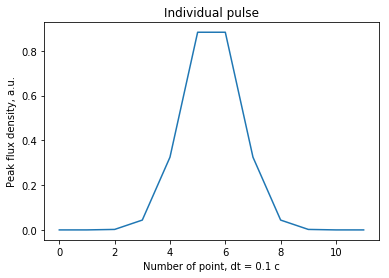

In [661]:
period_s = 1.2 # Период исскуственного пульсара
demen = 10e0
pulse = signal.gaussian(period_s*demen, std=1, sym=True)
plt.close()
plt.title('Individual pulse')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.plot(pulse)
print(1/period_s)

In [700]:
ampl_noise = 0.1
len_noise_left = 1
len_noise_right = 1
idx = 1
obser = []
for i in range(10):
    obser.append([])
    for j in range(100):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, ampl_noise, len(pulse)))
left_noise = np.random.normal(0, ampl_noise, int(len(obser[idx])/len_noise_left))
right_noise = np.random.normal(0, ampl_noise, int(len(obser[idx])/len_noise_right))
#obser[idx] = np.hstack([left_noise, obser[idx], right_noise])

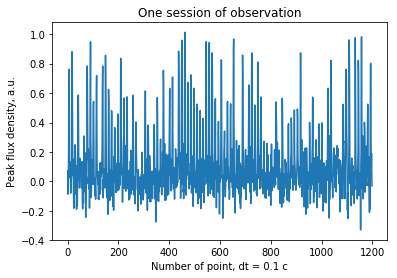

In [701]:
plt.close()
plt.plot(obser[idx])
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [702]:
# Звездные сутки 86164,090530833 с

In [665]:
# Судя по всему алгоритм доведения размерности массива до 2n радобает не совсем корректно,
# поскольку приводит к неточности
# n & (n - 1) равно нулю только для нуля и степеней двойки (& -- побитовое "и")
noised_obser = obser[idx][:]
obs_points = len(noised_obser)
fs = demen # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.4*max(Pxx_den))
main_harm = f[peaks][0]
print('*** ' + 'Оригинальный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)
noised_obser = size2n(noised_obser, 'up')
obs_points = len(noised_obser)
print("No 2**n" if obs_points & (obs_points - 1) else "2**n")
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.4*max(Pxx_den))
main_harm = f[peaks][0]
print('*** ' + 'Увеличенный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)

*** Оригинальный массив ***
Основная гармоника:  0.8333333333333333
Неточность определения:  1.1102230246251565e-16
Размер массива:  120
Отношение к периоду:  100.0
2**n
*** Увеличенный массив ***
Основная гармоника:  0.859375
Неточность определения:  0.02604166666666663
Размер массива:  128
Отношение к периоду:  106.66666666666667


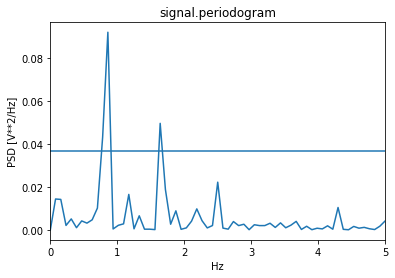

In [666]:
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
plt.axhline(0.4*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 5)
plt.show()

In [703]:
joined_array_zero = np.hstack([obser[0], np.zeros(8*len(obser[0])), obser[1]])
joined_array_full = np.hstack([i for i in obser])

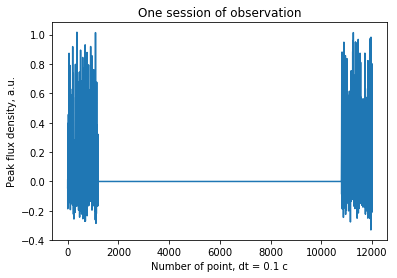

In [704]:
plt.close()
plt.plot(joined_array_zero)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

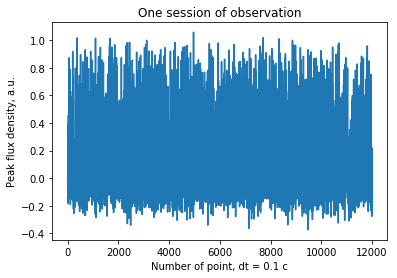

In [705]:
plt.close()
plt.plot(joined_array_full)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [712]:
noised_obser = joined_array_full
obs_points = len(noised_obser)
fs = demen # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.4*max(Pxx_den))
main_harm = f[peaks][0]
print('*** ' + 'Оригинальный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)
noised_obser = size2n(noised_obser, 'up')
obs_points = len(noised_obser)
print("No 2**n" if obs_points & (obs_points - 1) else "2**n")
f, Pxx_den = signal.periodogram(noised_obser, fs)
peaks, _ = signal.find_peaks(Pxx_den, height=0.4*max(Pxx_den))
main_harm = f[peaks][0]
print('*** ' + 'Увеличенный массив' + ' ***' )
print('Основная гармоника: ', main_harm)
print('Неточность определения: ',abs(main_harm - 1/period_s))
print('Размер массива: ', len(noised_obser))
print('Отношение к периоду: ', len(noised_obser)/period_s)

*** Оригинальный массив ***
Основная гармоника:  0.8333333333333334
Неточность определения:  0.0
Размер массива:  12000
Отношение к периоду:  10000.0
2**n
*** Увеличенный массив ***
Основная гармоника:  0.8331298828125
Неточность определения:  0.00020345052083337034
Размер массива:  16384
Отношение к периоду:  13653.333333333334


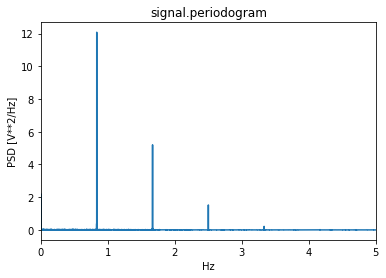

In [713]:
fs = demen # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(noised_obser, fs)
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 5)
plt.show()

In [346]:
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
for i in f[peaks][0:10]:
    print(i, i/main_harm)

0.8038585209003214 1.0
1.6077170418006428 2.0
2.411575562700964 3.0
3.2154340836012856 4.0
4.019292604501607 5.0
4.823151125401928 6.0
5.62700964630225 7.0
6.430868167202571 8.0
7.234726688102893 9.0
8.038585209003214 10.0


In [474]:
print(abs(main_harm - 1/period_s))

0.0008138020833333703


In [475]:
print(2/period_s)

1.6666666666666667
